In [1]:
import os
os.chdir('/home/jupyter/ntu/csie-cv/hw1')

from PIL import Image
import numpy as np
import copy

def save_image(img, path='./lena.bmp'):
    img_ = Image.fromarray(np.array(img, dtype='uint8'), mode='L')
    img_.save(path)
    return img_

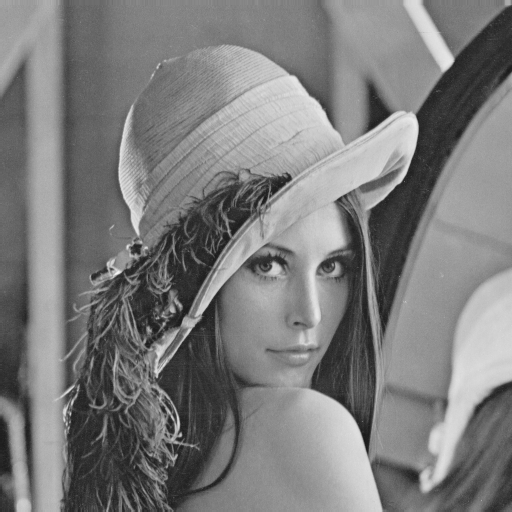

In [2]:
img = Image.open('./lena.bmp')
img

In [3]:
img_array = np.array(img)
width, height = img_array.shape
img_list = img_array.tolist()

# Part I
## a. upside down

### method 1: row exchange

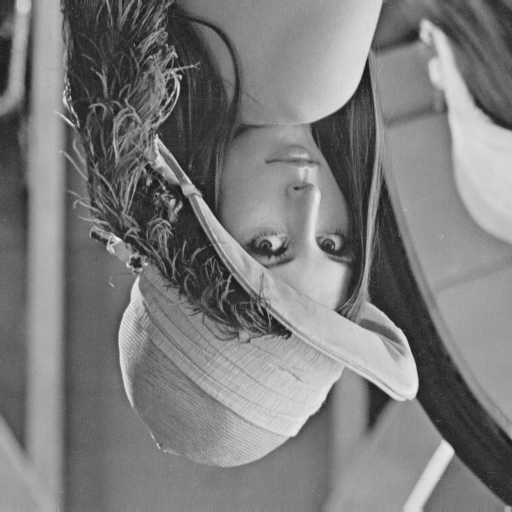

In [4]:
def upside_down(img, height=height, width=width):
    for y in range(height//2):
        for x in range(width):
            elm = img[y][x]
            img[y][x] = img[(height-1)-y][x]
            img[(height-1)-y][x] = elm
    return img
    
result = copy.deepcopy(img_list)
save_image(upside_down(result), './lena_upside_down.bmp')

### method 2: reverse y index

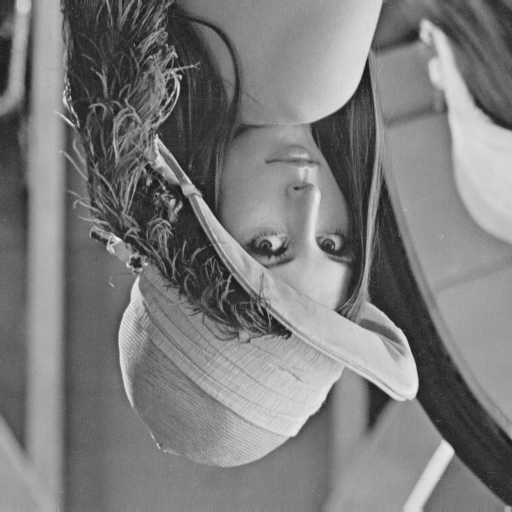

In [5]:
result = img_array.copy()
result = result[np.arange(511,-1,-1)]

save_image(result, './lena_upside_down.bmp')

## b. right-side-left

### method 1: col exchange

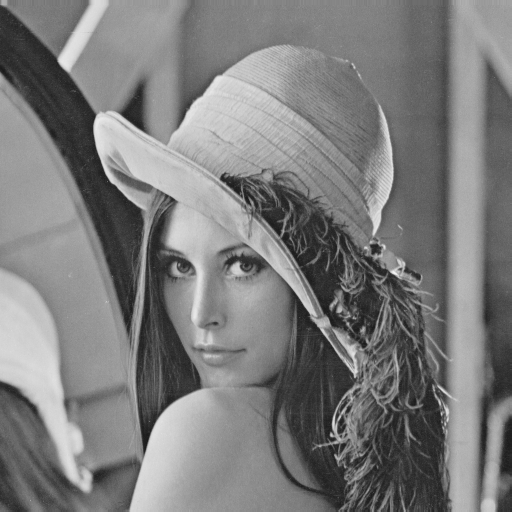

In [6]:
def rightside_left(img, height=height, width=width):
    for y in range(height):
        for x in range(width//2):
            elm = img[y][x]
            img[y][x] = img[y][(width-1)-x]
            img[y][(width-1)-x] = elm
    return img

result = copy.deepcopy(img_list)
save_image(rightside_left(result), './lena_rightside_left.bmp')

### method 2: reverse x index

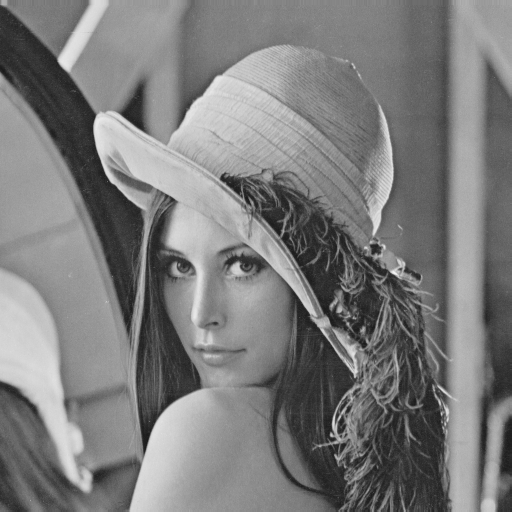

In [7]:
result = img_array.copy()
result = result[:,range(511,-1,-1)]

save_image(result, './lena_rightside_left.bmp')

## c. diagonally flip

### method 1: row exanch + col exchange

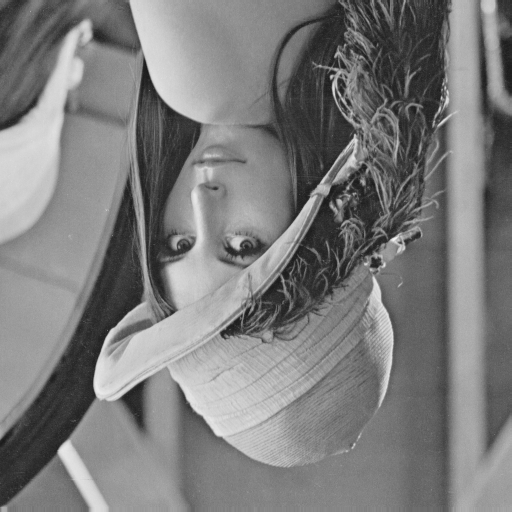

In [8]:
def digonal_flip(img, height=height, width=width):
    img = upside_down(img, height, width)
    img = rightside_left(img, height, width)
    return img
    
result = copy.deepcopy(img_list)
save_image(digonal_flip(result), './lena_diagonal_mirrored.bmp')

### method 2: reverse y index + reverse x index

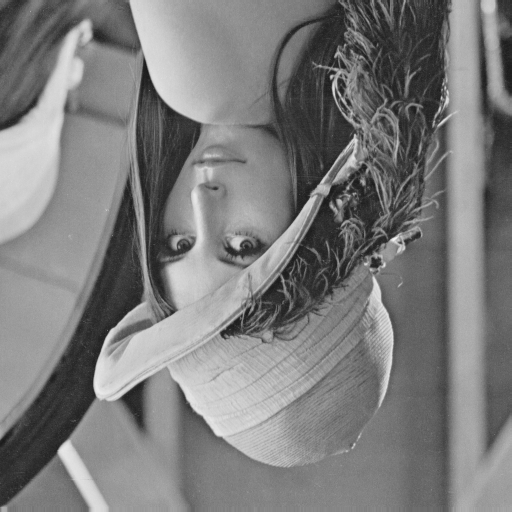

In [9]:
result = img_array.copy()
result = result[np.arange(511,-1,-1)]
result = result[:,np.arange(511,-1,-1)]

save_image(result, './lena_diagonal_mirrored.bmp')

# 3. shrink the size to half

### method a: interleaving drop

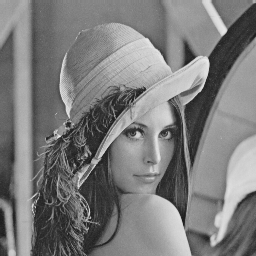

In [10]:
def shrink(img, height=height, width=width):
    for y in range(0, height, 2):
        for x in range(0, width, 2):
            elm = img[y][x]
            img[y//2][x//2] = elm
    img = [ [img[y][x] for x in range(0, width//2)] for y in range(0, height//2)]
    return img

result = copy.deepcopy(img_list)
save_image(shrink(result), './lena_shrink.bmp')

### method b: mean

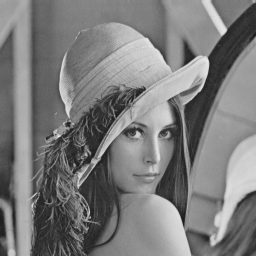

In [11]:
def shrink_mean(img, height=height, width=width):
    for y in range(0, height, 2):
        for x in range(0, width, 2):
            elm = sum((img[y][x], img[y][x+1], img[y+1][x],img[y+1][x+1]))/4
            img[y//2][x//2] = elm
    img = [ [img[y][x] for x in range(0, width//2)] for y in range(0, height//2)]
    return img

result = copy.deepcopy(img_list)
save_image(shrink_mean(result), './lena_shrink_mean.bmp')

# 4. Binarize 

### method a: sequensial

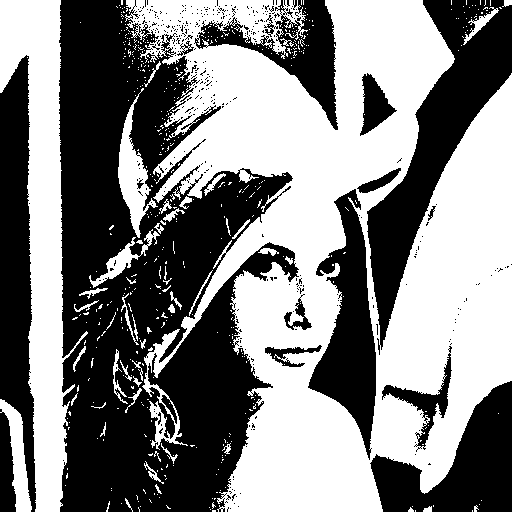

In [12]:
def binarize(img, height=height, width=width):
    for y in range(height):
        for x in range(width):
            img[y][x] = 255 if img[y][x] >= 128 else 0
    return img
    
result = copy.deepcopy(img_list)
save_image(binarize(result), './lena_binarize.bmp')

### method b: parallel

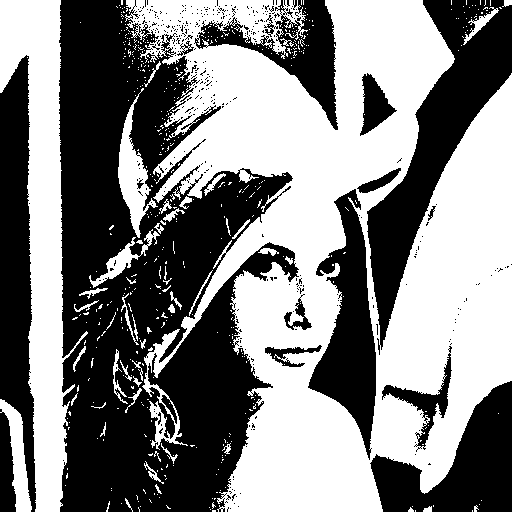

In [13]:
result = img_array.copy()
bright = result >= 128
result[bright] = 255
result[~bright] = 0

save_image(result, './lena_binarize.bmp')

# 6. Negative

### method a: sequensial

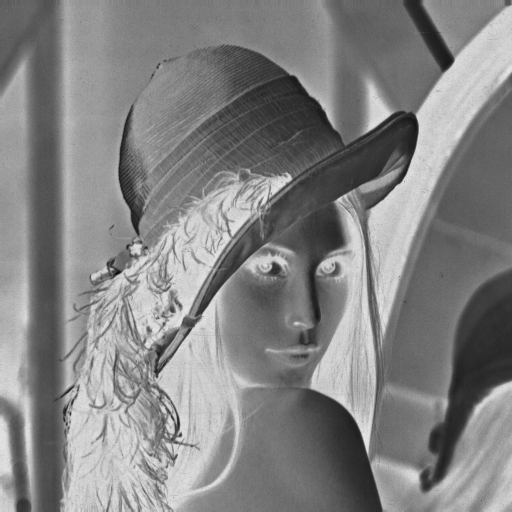

In [14]:
def negative(img, height=height, width=width):
    for y in range(height):
        for x in range(width):
            img[y][x] = 255-img[y][x]
    return img

result = copy.deepcopy(img_list)
save_image(negative(result), './lena_negative.bmp')